In [1]:
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import fmax as fm
import numpy as np

# Some plotting functions

In [2]:
def plot_posterior_predictive(fcast_model, label, figsize=(13,8)):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.posterior_predictive_samples
    index = fcast_model.train_index

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.01, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.1, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.9, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.99, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=figsize)

    t_index = [1968+i for i in range(len(index))]

    axs.fill_between(t_index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="99% CI", color="C0")
    axs.fill_between(t_index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="80% CI", color="C0")
    axs.plot(t_index, medians, label="Median")
    axs.plot(t_index, fcast_model.train_data, color="red", label="Training")
    axs.legend()
    axs.set_xlabel("Year")
    axs.set_ylabel("Record (in seconds)")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [3]:
def plot_posterior_predictive_w_mean(fcast_model, label, figsize=(13,8)):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.posterior_predictive_samples
    index = fcast_model.train_index

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.01, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.1, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.9, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.99, axis=0)
    mean = np.mean(sample_paths, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=figsize)

    t_index = [1968+i for i in range(len(index))]

    axs.fill_between(t_index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="99% CI", color="C0")
    axs.fill_between(t_index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="80% CI", color="C0")
    axs.plot(t_index, medians, label="Median")
    axs.plot(t_index, mean, label="Mean")
    axs.plot(t_index, fcast_model.train_data, color="red", label="Training")
    axs.legend()
    axs.set_xlabel("Year")
    axs.set_ylabel("Record (in seconds)")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [4]:
def plot_forecast(fcast_model, test_data, label, actual, figsize=(13,8)):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.025, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.16, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.84, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.975, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=figsize)
        
    # axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="99% CI", color="C0")
    # axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="80% CI", color="C0")
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="95% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="68% CI", color="C0")
    
    axs.plot(index, medians, label="Median")
    axs.plot(fcast_model.train_index, fcast_model.train_data, color="red", label="Training")
    axs.plot(fcast_model.fcast_index, test_data, color="black", label="Tryfos")
    axs.plot(fcast_model.fcast_index, actual, color="green", label="Actual")
    axs.legend()
    axs.set_xlabel("Year")
    axs.set_ylabel("Record (in seconds)")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [5]:
def plot_forecast_w_mean(fcast_model, test_data, label, actual, figsize=(13,8)):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.025, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.16, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.84, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.975, axis=0)
    mean = np.mean(sample_paths, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=figsize)
        
    # axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="99% CI", color="C0")
    # axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="80% CI", color="C0")
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="95% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="68% CI", color="C0")
    
    axs.plot(index, medians, label="Median")
    axs.plot(index, mean, label="Mean")
    axs.plot(fcast_model.train_index, fcast_model.train_data, color="red", label="Training")
    axs.plot(fcast_model.fcast_index, test_data, color="black", label="Tryfos")
    axs.plot(fcast_model.fcast_index, actual, color="green", label="Actual")
    axs.legend()
    axs.set_xlabel("Year")
    axs.set_ylabel("Record (in seconds)")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [6]:
def plot_forecast_fin(fcast_model, test_data, label, actual, figsize=(13,8)):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Convert to the actual years
    index = [1968+i for i in range(len(index))]

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.025, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.16, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.84, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.975, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=figsize)
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="95% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="68% CI", color="C0")
    axs.plot(index, medians, label="Median", color="blue")
    axs.plot([1968+i for i in range(len(fcast_model.train_index))], fcast_model.train_data, color="green", label="Training")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], test_data, color="black", label="Tryfos")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], actual, color="red", label="Actual")
    axs.legend()
    axs.set_xlabel("Year")
    axs.set_ylabel("Record (in seconds)")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [7]:
def plot_forecast_fin_w_mean(fcast_model, test_data, label, actual, figsize=(13,8)):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Convert to the actual years
    index = [1968+i for i in range(len(index))]

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.025, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.16, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.84, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.975, axis=0)
    mean = np.mean(sample_paths, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=figsize)
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="95% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="68% CI", color="C0")
    axs.plot(index, medians, label="Median", color="blue")
    axs.plot(index, mean, label="Mean", color="purple")
    axs.plot([1968+i for i in range(len(fcast_model.train_index))], fcast_model.train_data, color="green", label="Training")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], test_data, color="black", label="Tryfos")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], actual, color="red", label="Actual")
    axs.legend()
    axs.set_xlabel("Year")
    axs.set_ylabel("Record (in seconds)")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [8]:
def plot_forecast_small(fcast_model, test_data, label, actual):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Convert to the actual years
    index = [1968+i for i in range(len(index))]

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.025, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.16, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.84, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.975, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=(8,5))
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="95% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="68% CI", color="C0")
    axs.plot(index, medians, label="Median", color="blue")
    axs.plot([1968+i for i in range(len(fcast_model.train_index))], fcast_model.train_data, color="green", label="Training")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], test_data, color="black", label="Tryfos")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], actual, color="red", label="Actual")
    axs.legend()
    #axs.set_xlabel("Period")
    #axs.set_ylabel("Record")
    #axs.set_title(label)

    fig.tight_layout()

    return fig

# Results for Gaussian

WARNING (theano.tensor.opt): Optimization Warning: The Op erfcx does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (3 chains in 1 job)
NUTS: [sigma, mu]


Sampling 3 chains for 5_000 tune and 2_500 draw iterations (15_000 + 7_500 draws total) took 33 seconds.
The acceptance probability does not match the target. It is 0.9676074254345858, but should be close to 0.99. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (3 chains in 1 job)
NUTS: [sigma, mu]


Sampling 3 chains for 5_000 tune and 2_500 draw iterations (15_000 + 7_500 draws total) took 30 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (3 chains in 1 job)
NUTS: [sigma, mu]


Sampling 3 chains for 5_000 tune and 2_500 draw iterations (15_000 + 7_500 draws total) took 30 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (3 chains in 1 job)
NUTS: [sigma, mu]


Sampling 3 chains for 5_000 tune and 2_500 draw iterations (15_000 + 7_500 draws total) took 29 seconds.


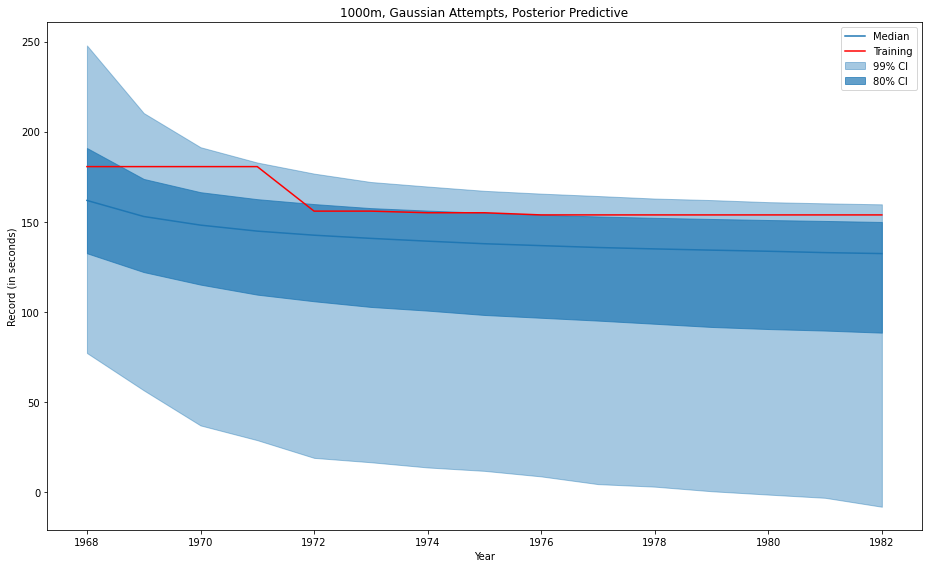

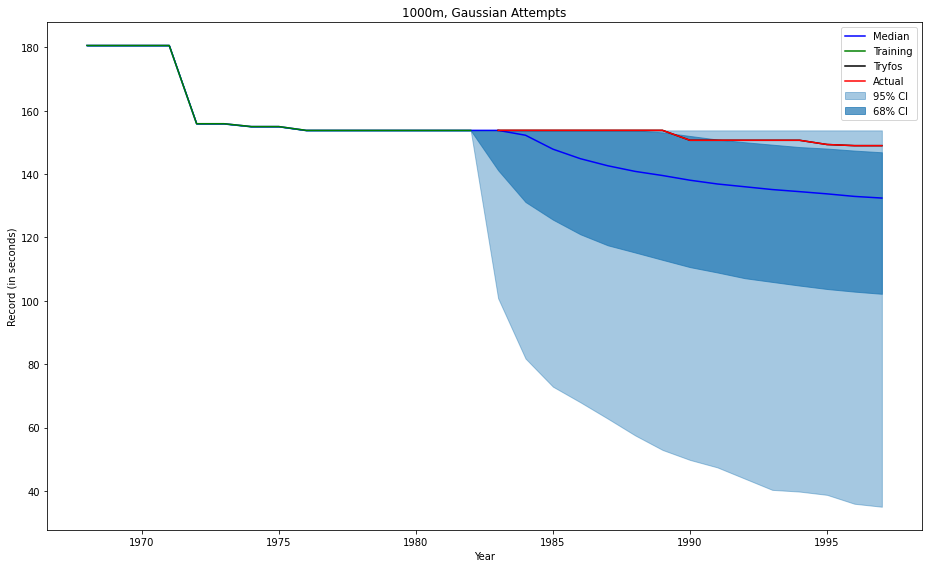

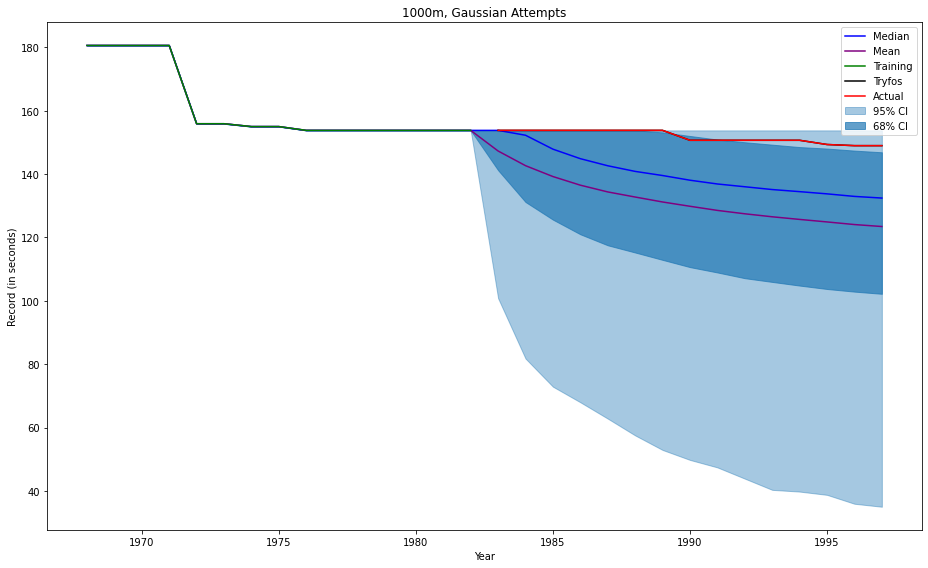

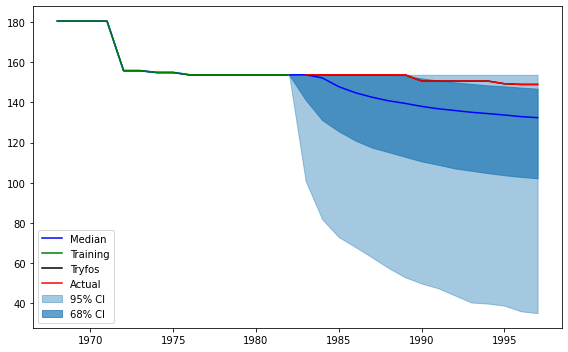

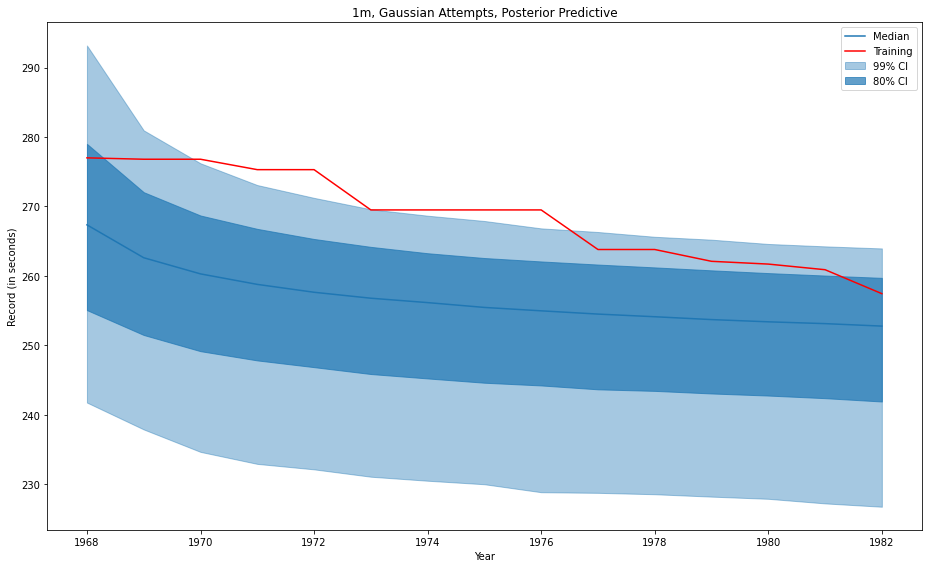

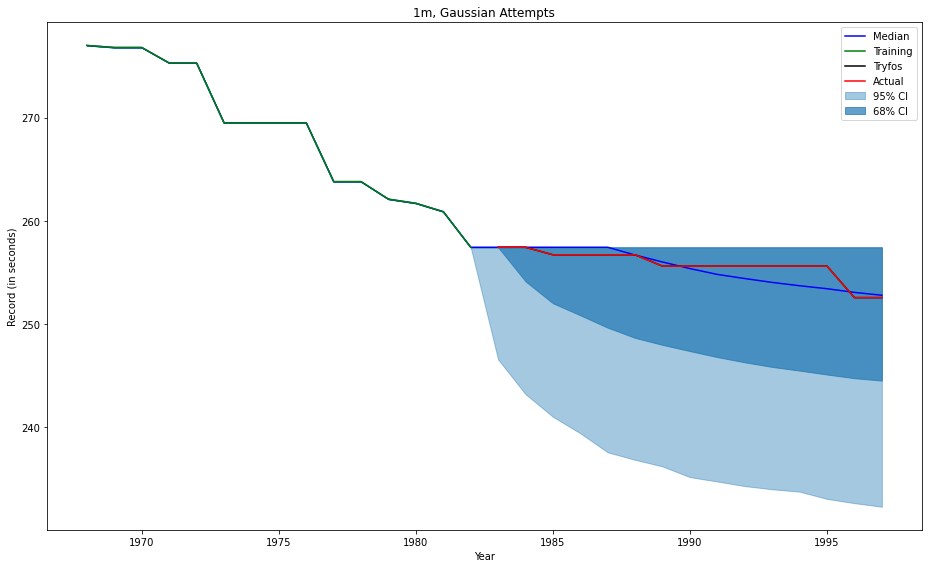

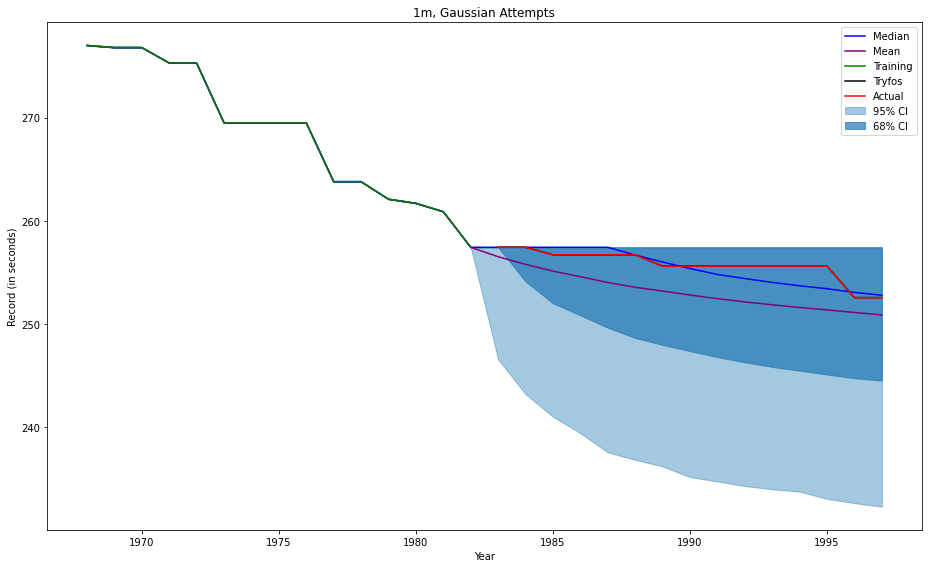

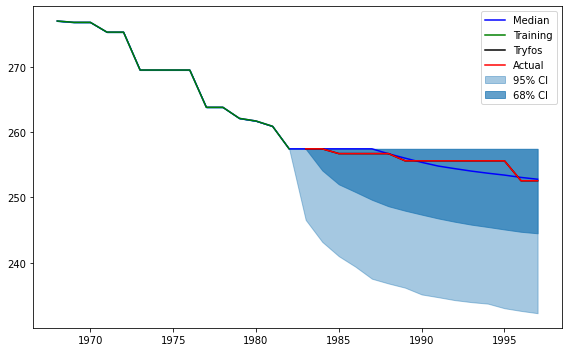

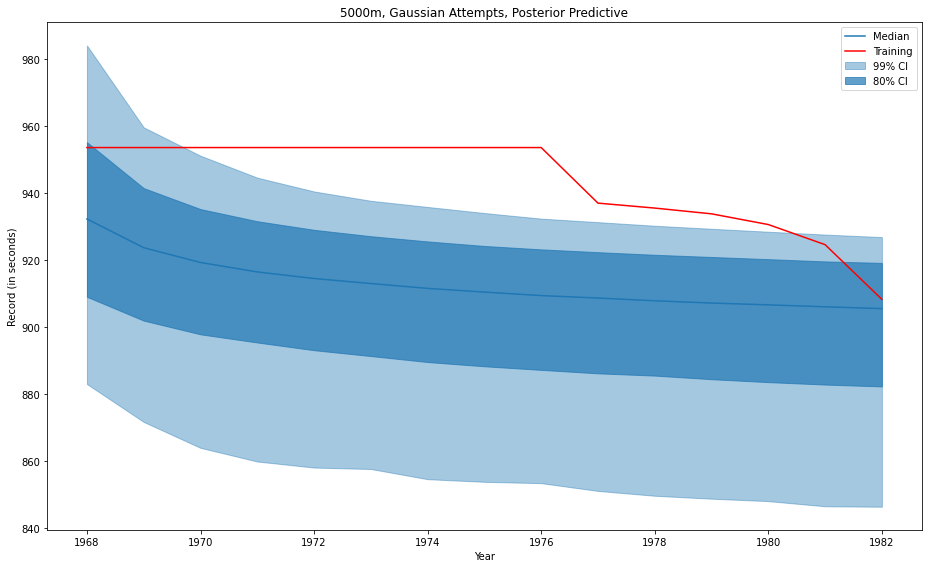

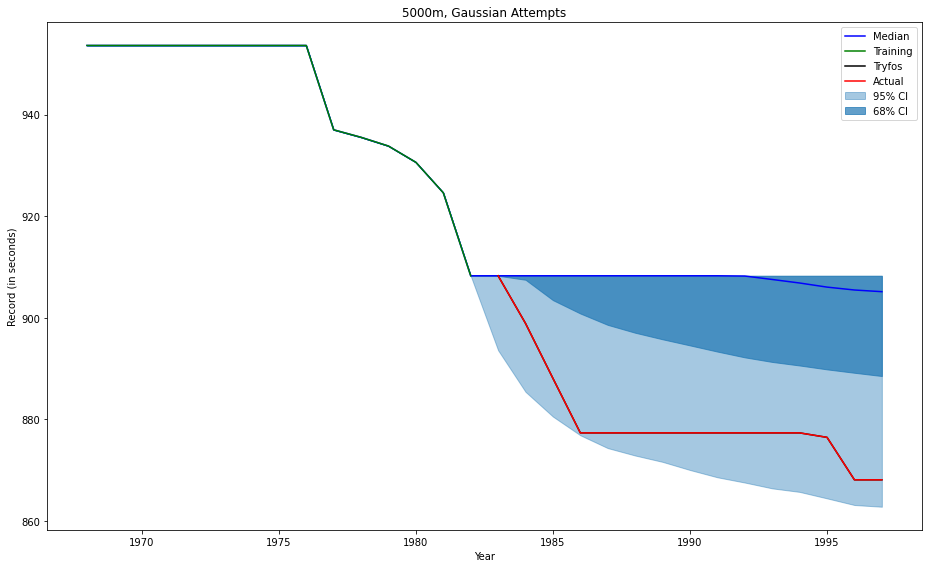

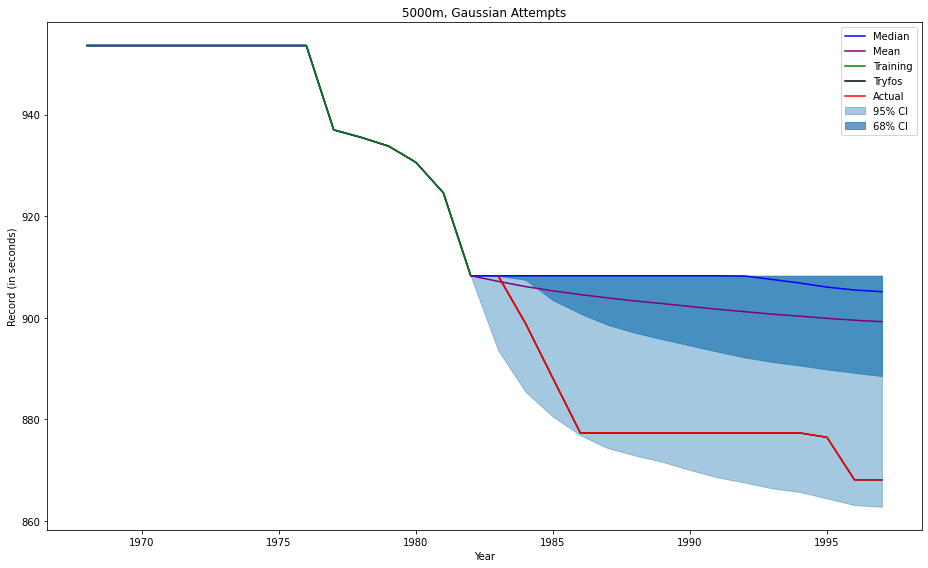

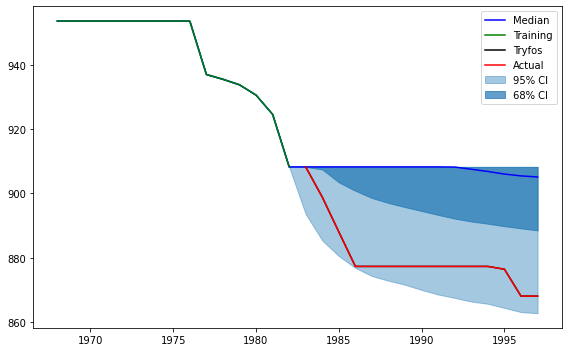

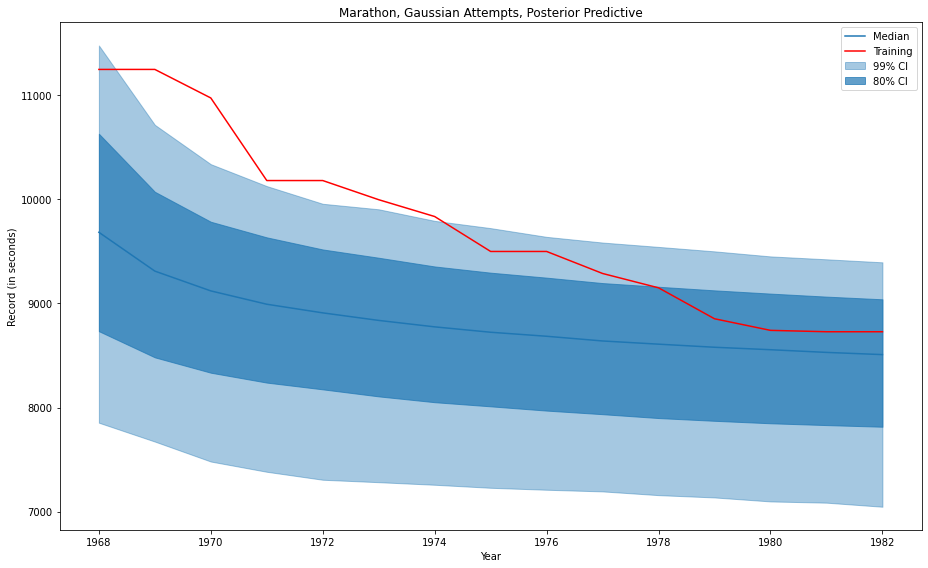

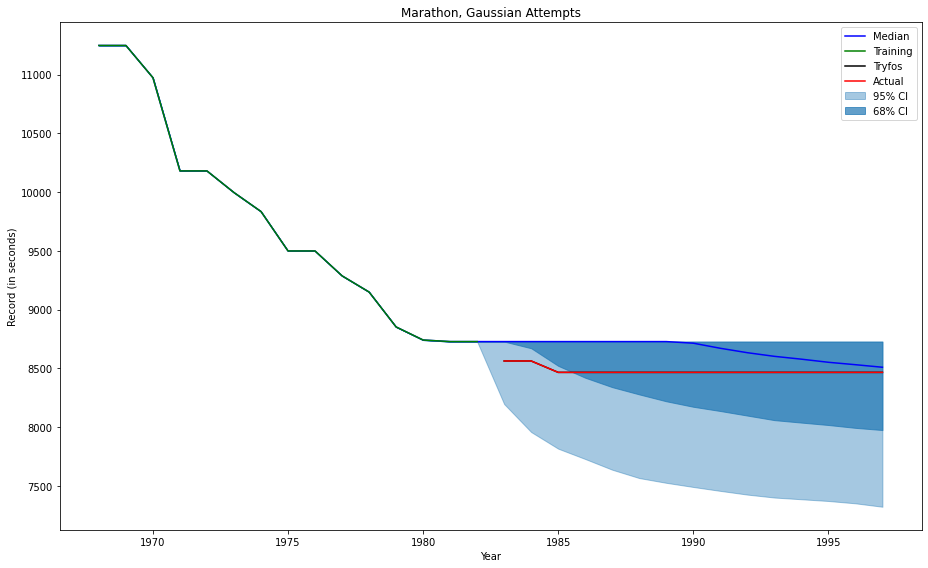

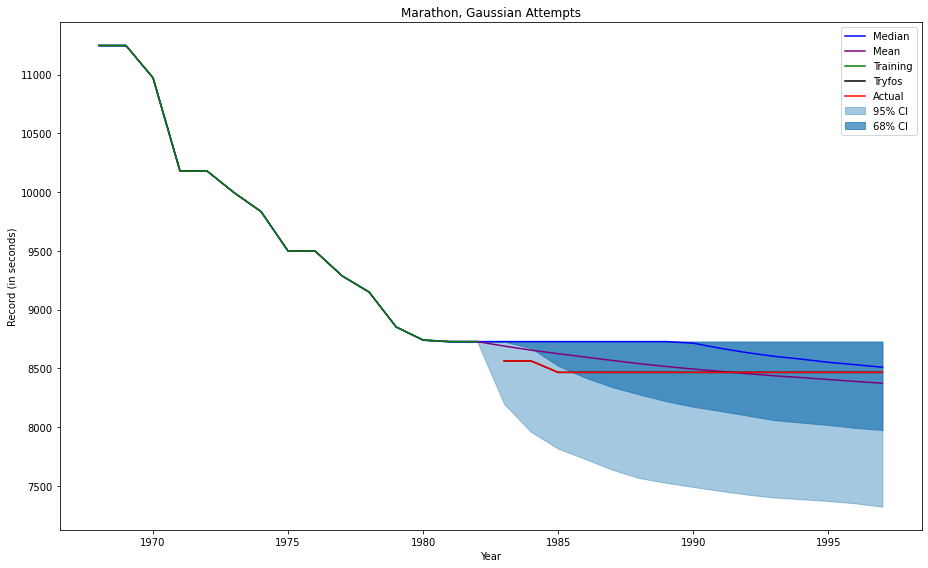

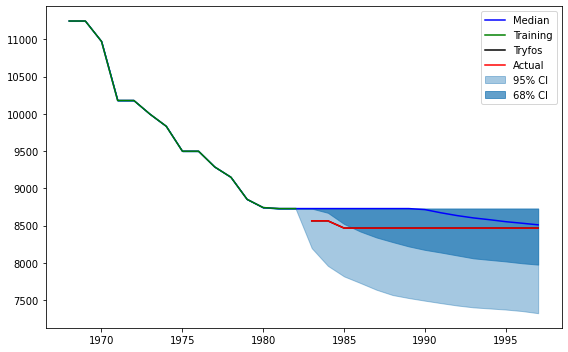

In [9]:
#whiches = ["1000m", "1m", "5000m", "Marathon", "10000m", "20000m"]
#whiches = ['20000m']
#whiches = ["1000m", "1m", "5000m", "Marathon", "10000m", "20000m"]
#whiches = ["20000m"]
#whiches = ["1000m", "1m", "5000m", "Marathon"]
whiches = ['1000m', '1m', '5000m', 'Marathon']
#whiches = ["1000m"]
#whiches = ["1000m"]
#whiches = ['1m']
#whiches = ['Marathon']

mses = {}
avg_log_probs = {}

fails = []

for which in whiches:
  try:
    df = pd.read_csv("tryfos_data_womens.csv")
    years, records = df["Year"].values, df[which].values # Years 1983 and onward are just forecasts

    actual_df = pd.read_csv("tryfos_actual_womens.csv")
    _, actual_records = actual_df["Year"].values, actual_df[which].values

    training_years = years[:15]
    training_records = records[:15]
    tryfos_years = years[15:]
    tryfos_fcast = records[15:]

    prior_parameters = {
              'mu' : {
                'mean' : training_records[0],
                'std' : 100*training_records[0],
              },
              'sigma' : {
                'lam' : 1/100
              }
            }

    model = fm.ForecastModel(training_records, prior_parameters=prior_parameters, attempt_distribution="gaussian", 
                                kind="min", train='all', fcast_len=len(tryfos_fcast), fcast_test_data=actual_records)
                                
    model.fit(chains=3, draws=2500)
    model.posterior_predictive()
    model.forecast()

    # MSE calculation
    median = np.quantile(model.forecast_samples[:,-15:], q=0.5, axis=0)
    mean = np.mean(model.forecast_samples[:,-15:], axis=0)
    bayes_mse = fm.mse(median, model.fcast_test_data)
    #tryfos_mse = fm.mse(tryfos_fcast, model.fcast_test_data)
    baseline_fcast = training_records[-1]*np.ones_like(model.fcast_test_data)
    baseline_mse = fm.mse(baseline_fcast, model.fcast_test_data)
    bayes_mean_mse = fm.mse(mean, model.fcast_test_data)
    mses[which] = (bayes_mse, baseline_mse, bayes_mean_mse)

    # Average logp
    avg_log_probs[which] = np.mean(model.posterior_predictive_ppc["log_like_holdout"])


    # Plots
    fig = plot_posterior_predictive(model, f"{which}, Gaussian Attempts, Posterior Predictive")
    fig.savefig(f"womens/flat_priors/gaussian/{which}_gaussian_attempts_post_pred.png")

    # fig = plot_forecast(model, tryfos_fcast, f"{which}, Gaussian Attempts, Forecast", actual_records)
    # fig.savefig(f"{which}_gaussian_attempts_forecast.png")

    fig = plot_forecast_fin(model, tryfos_fcast, f"{which}, Gaussian Attempts", actual_records)
    fig.savefig(f"womens/flat_priors/gaussian/final_{which}_gaussian_attempts_forecast.png")

    fig = plot_forecast_fin_w_mean(model, tryfos_fcast, f"{which}, Gaussian Attempts", actual_records)
    fig.savefig(f"womens/flat_priors/gaussian/final_{which}_gaussian_attempts_forecast_with_mean.png")

    fig = plot_forecast_small(model, tryfos_fcast, f"{which}, Gaussian Attempts", actual_records)
    fig.savefig(f"womens/flat_priors/gaussian/s_final_{which}_gaussian_attempts_forecast.png")


  except:
    print(f"failed for {which}")
    fails.append(which)

In [ ]:
(bayes_mse, baseline_mse, bayes_mean_mse)

In [10]:
mses

{'1000m': (163.6212196015362, 7.689393333333416, 436.42120224689427),
 '1m': (1.006261221300941, 4.880179999999975, 7.754370232029683),
 '5000m': (840.9696363532014, 889.6367333333305, 565.3437056689742),
 'Marathon': (38275.65320347703, 63121.46666666667, 7129.153301603059)}

In [11]:
avg_log_probs

{'1000m': -16.975391754609376,
 '1m': -16.77297328854874,
 '5000m': -54.615367186970495,
 'Marathon': -17.98934704320524}

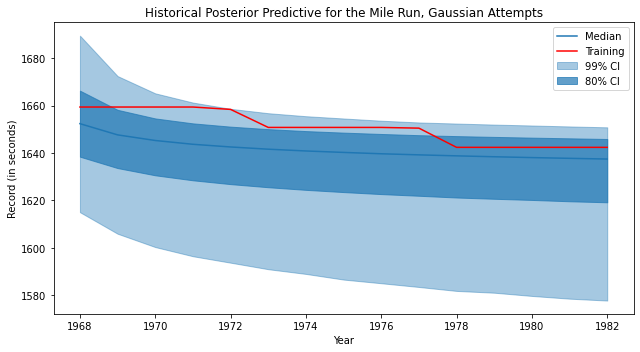

In [12]:
fig = plot_posterior_predictive(model, f"Historical Posterior Predictive for the Mile Run, Gaussian Attempts", figsize=(9,5))
fig.savefig(f"womens/flat_priors/article_gaussian_attempts_post_pred_mile_run.png")

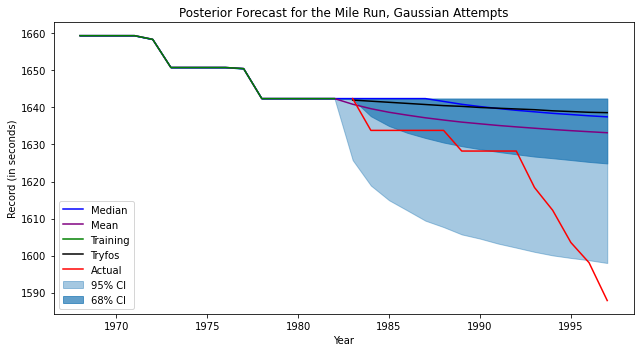

In [13]:
fig = plot_forecast_fin_w_mean(model, tryfos_fcast, f"Posterior Forecast for the Mile Run, Gaussian Attempts", actual_records, figsize=(9,5))
fig.savefig(f"flat_priors/article_gaussian_attempts_fcast_mile_run.png")

C:\Users\Jonathan\AppData\Local\Temp/ipykernel_38040/1110133197.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


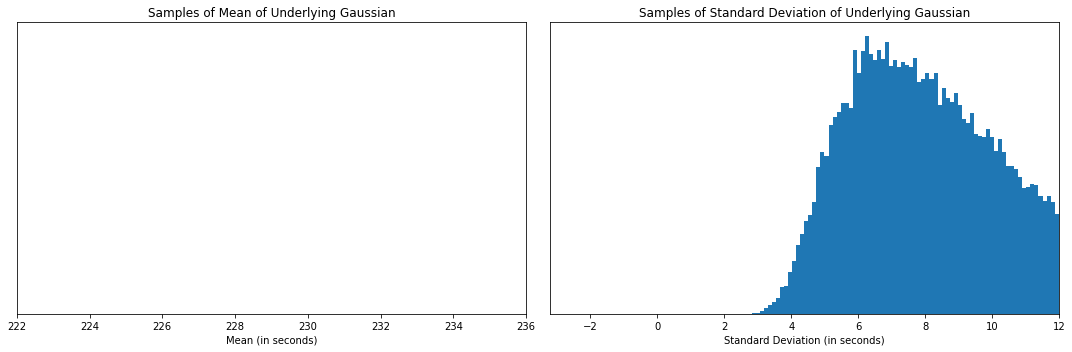

In [14]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].hist(model.trace.posterior.mu.values.flatten(), bins=1000)
axs[0].set_title('Samples of Mean of Underlying Gaussian')
axs[0].set_xlabel('Mean (in seconds)')
axs[0].set_yticks([])
axs[0].set_xlim(222, 236)

axs[1].hist(model.trace.posterior.sigma.values.flatten(), bins=1000)
axs[1].set_title('Samples of Standard Deviation of Underlying Gaussian')
axs[1].set_xlabel('Standard Deviation (in seconds)')
axs[1].set_yticks([])
axs[1].set_xlim(None,12)

fig.tight_layout()

fig.savefig(f"flat_priors/article_gaussian_attempts_posterior_hist.png")

fig.show()

In [82]:
import arviz as az

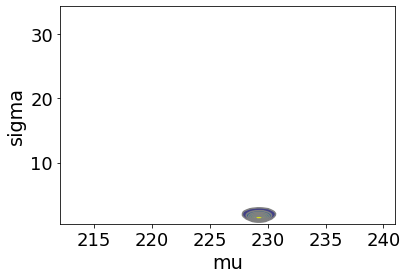

In [88]:
az.plot_pair(model.trace,
            kind='kde',
            var_names=['mu', 'sigma'],
            backend_kwargs
            textsize=18)
    
plt.show()

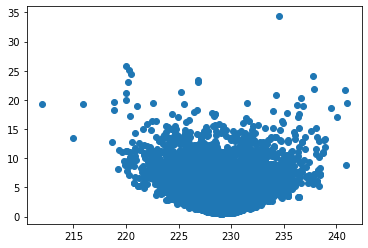

In [81]:
plt.scatter([model.trace.posterior.mu.values.flatten()], model.trace.posterior.sigma.values.flatten())

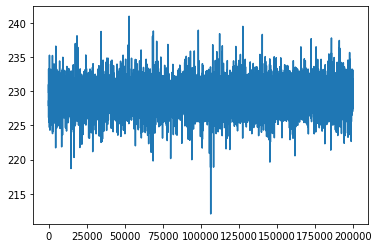

In [73]:
plt.plot(model.trace.posterior.mu.values.flatten())

# Gumbel

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (3 chains in 1 job)
NUTS: [sigma, mu]


Sampling 3 chains for 5_000 tune and 2_500 draw iterations (15_000 + 7_500 draws total) took 27 seconds.


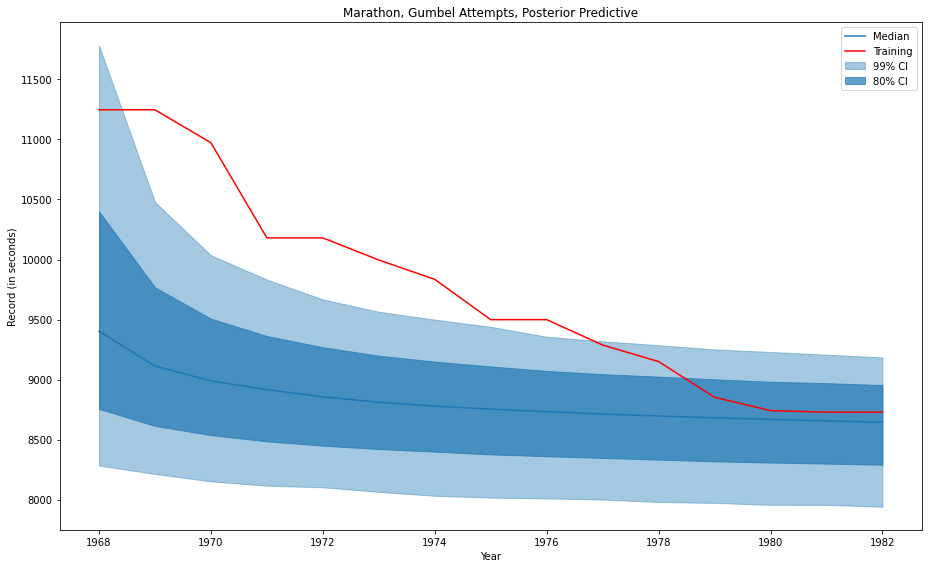

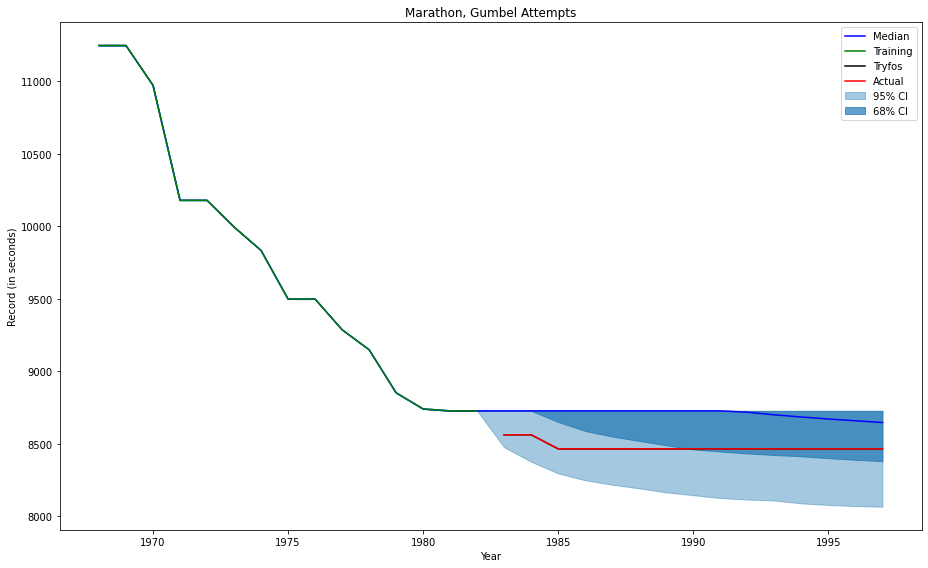

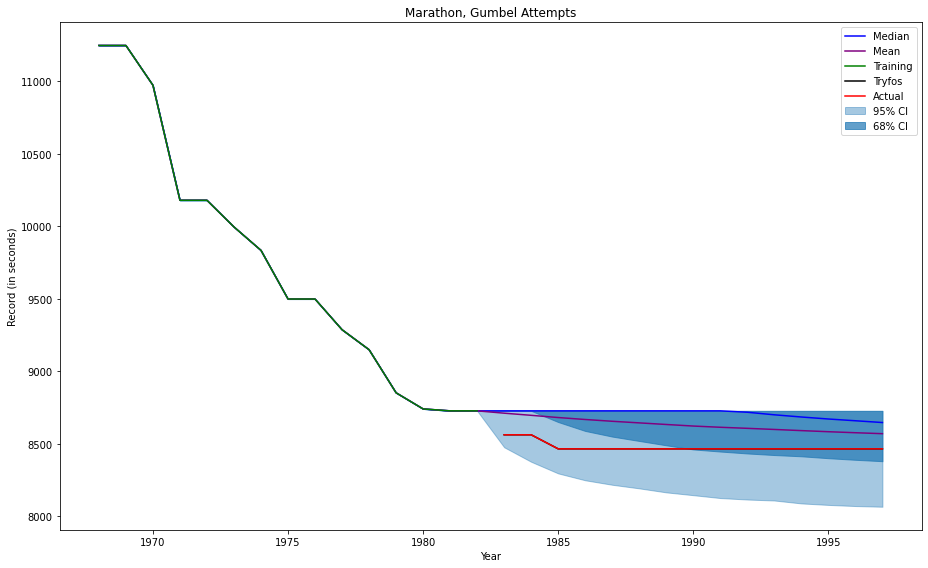

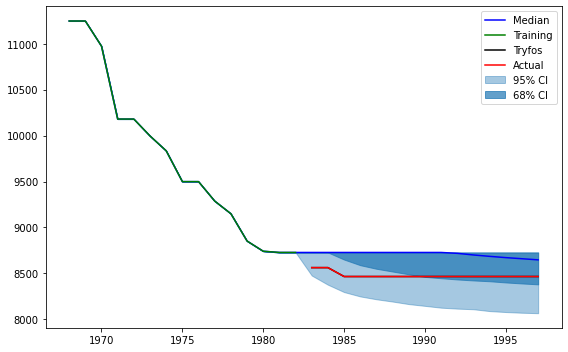

In [33]:
#whiches = ["1m", "5000m", "10000m", "Marathon"]
#whiches = ["1000m", "1m", "5000m", "Marathon", "10000m", "20000m"]
#whiches = []

#whiches = ["20000m"]
#whiches = ['1000m', '1m', '5000m', 'Marathon']
whiches = ['Marathon']

mses = {}
avg_log_probs = {}

fails = []

#whiches = ["1000m"]
for which in whiches:

    # try:

    df = pd.read_csv("tryfos_data_womens.csv")
    years, records = df["Year"].values, df[which].values # Years 1983 and onward are just forecasts

    training_years = years[:15]
    training_records = records[:15]
    tryfos_years = years[15:]
    tryfos_fcast = records[15:]

    actual_df = pd.read_csv("tryfos_actual_womens.csv")
    _, actual_records = actual_df["Year"].values, actual_df[which].values

    prior_parameters = {
            'mu' : {
                'mean' : 0.7*training_records[0],
                'std' : 30*training_records[0],
            },
            'sigma' : {
                'lam' : 1/100
            }
        }

    model = fm.ForecastModel(training_records, prior_parameters=prior_parameters, attempt_distribution="gumbel", 
                                kind="min", train='all', fcast_len=len(tryfos_fcast), fcast_test_data=actual_records)
    
    model.fit(chains=3, draws=2500)
    model.posterior_predictive()
    model.forecast()


    # MSE calculation
    median = np.quantile(model.forecast_samples[:,-15:], q=0.5, axis=0)
    mean = np.mean(model.forecast_samples[:,-15:], axis=0)
    bayes_mse = fm.mse(median, model.fcast_test_data)
    #tryfos_mse = fm.mse(tryfos_fcast, model.fcast_test_data)
    baseline_fcast = training_records[-1]*np.ones_like(model.fcast_test_data)
    baseline_mse = fm.mse(baseline_fcast, model.fcast_test_data)
    bayes_mean_mse = fm.mse(mean, model.fcast_test_data)
    mses[which] = (bayes_mse, baseline_mse, bayes_mean_mse)

    # Average logp
    avg_log_probs[which] = np.mean(model.posterior_predictive_ppc["log_like_holdout"])

    # Plots
    fig = plot_posterior_predictive(model, f"{which}, Gumbel Attempts, Posterior Predictive")
    fig.savefig(f"womens/flat_priors/gumbel/final_{which}_gumbel_attempts_post_pred.png")

    # fig = plot_forecast(model, tryfos_fcast, f"{which}, Gumbel Attempts, Forecast", actual_records)
    # fig.savefig(f"{which}_gumbel_attempts_forecast.png")

    fig = plot_forecast_fin(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
    fig.savefig(f"womens/flat_priors/gumbel/final_{which}_gumbel_attempts_forecast.png")

    fig = plot_forecast_fin_w_mean(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
    fig.savefig(f"womens/flat_priors/gumbel/final_{which}_gumbel_attempts_forecast_w_mean.png")

    fig = plot_forecast_small(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
    fig.savefig(f"womens/flat_priors/gumbel/s_final_{which}_gumbel_attempts_forecast.png")



    # except:
    #    print(f"Error: failed on {which}")
    #    fails.append(which)

In [11]:
# mses[which] = (bayes_mse, tryfos_mse, baseline_mse, bayes_mean_mse)

In [34]:
mses

{'Marathon': (54319.626838986216, 63121.46666666667, 24141.173659879954)}

In [35]:
avg_log_probs

{'Marathon': -18.24317653693661}

In [31]:
training_records[0]

11247.2

# Weibull

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (3 chains in 1 job)
NUTS: [beta, alpha]


Sampling 3 chains for 5_000 tune and 2_500 draw iterations (15_000 + 7_500 draws total) took 33 seconds.
The number of effective samples is smaller than 25% for some parameters.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (3 chains in 1 job)
NUTS: [beta, alpha]


Sampling 3 chains for 5_000 tune and 2_500 draw iterations (15_000 + 7_500 draws total) took 37 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (3 chains in 1 job)
NUTS: [beta, alpha]


Sampling 3 chains for 5_000 tune and 2_500 draw iterations (15_000 + 7_500 draws total) took 38 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (3 chains in 1 job)
NUTS: [beta, alpha]


Sampling 3 chains for 5_000 tune and 2_500 draw iterations (15_000 + 7_500 draws total) took 31 seconds.


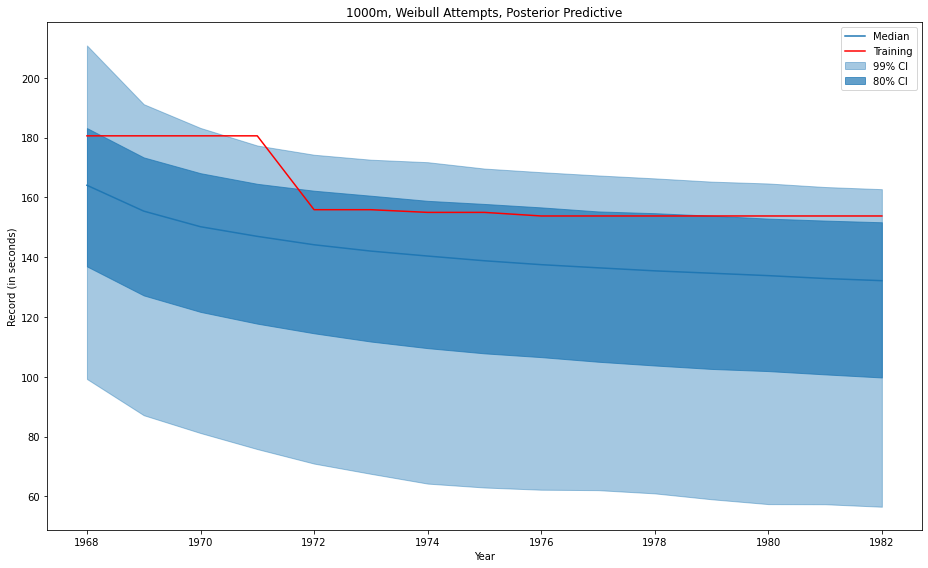

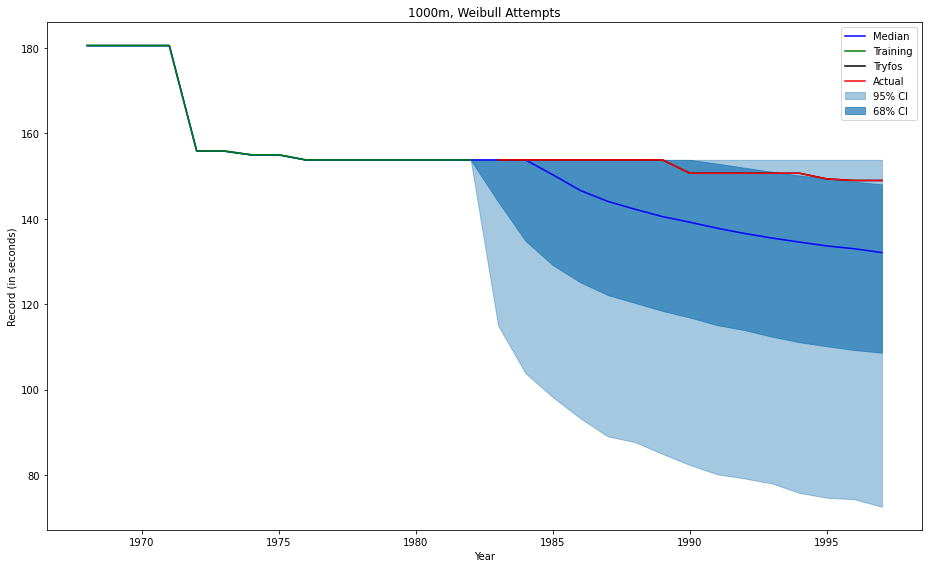

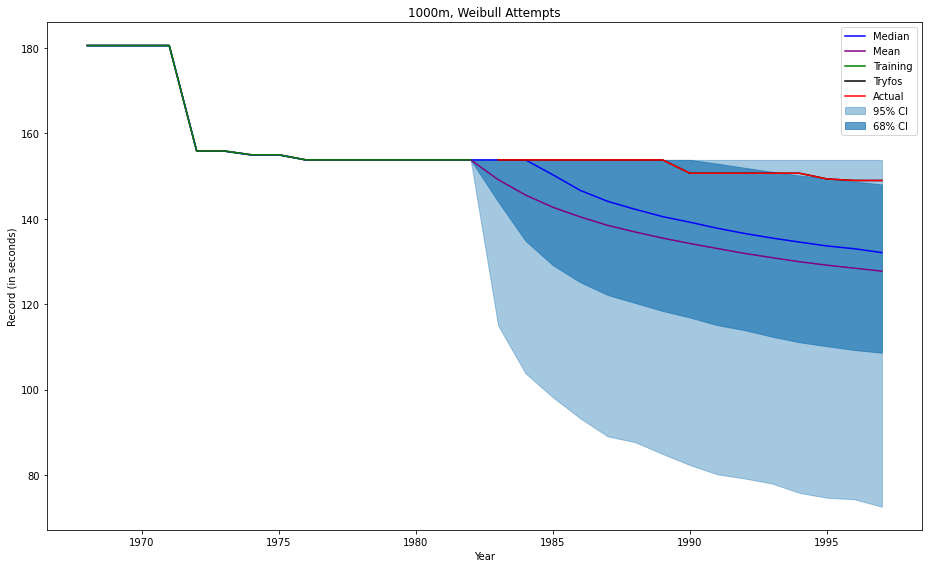

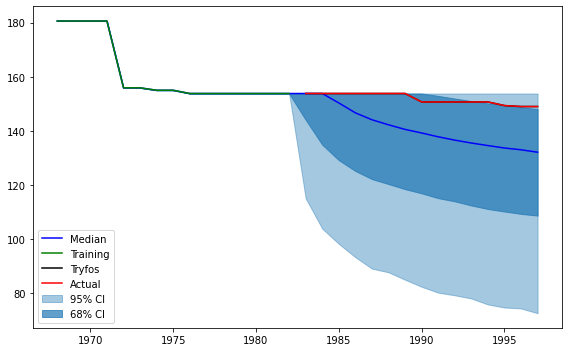

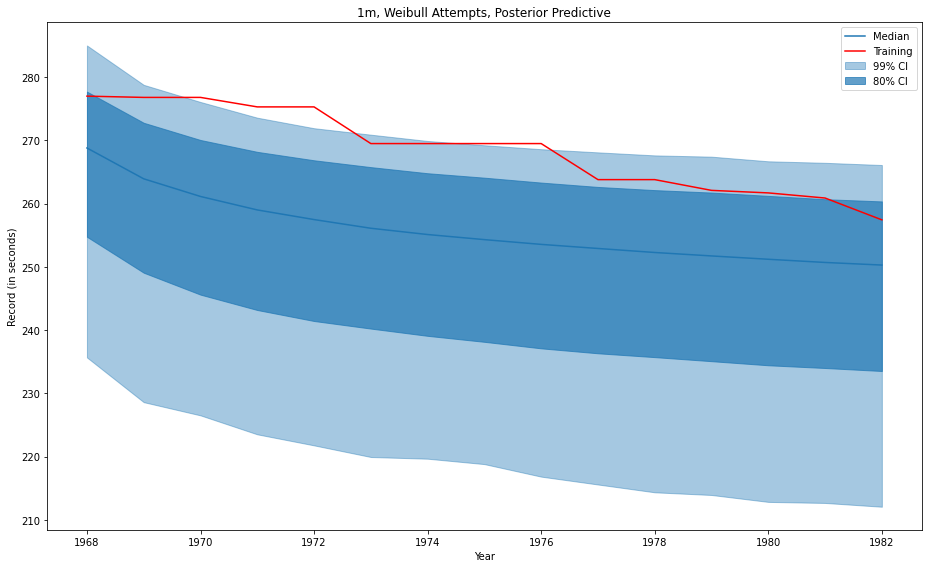

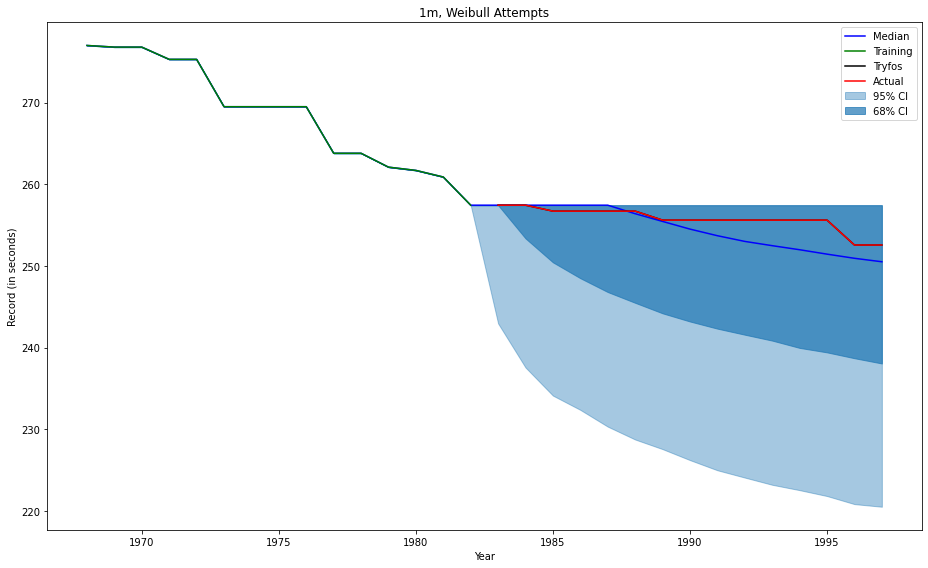

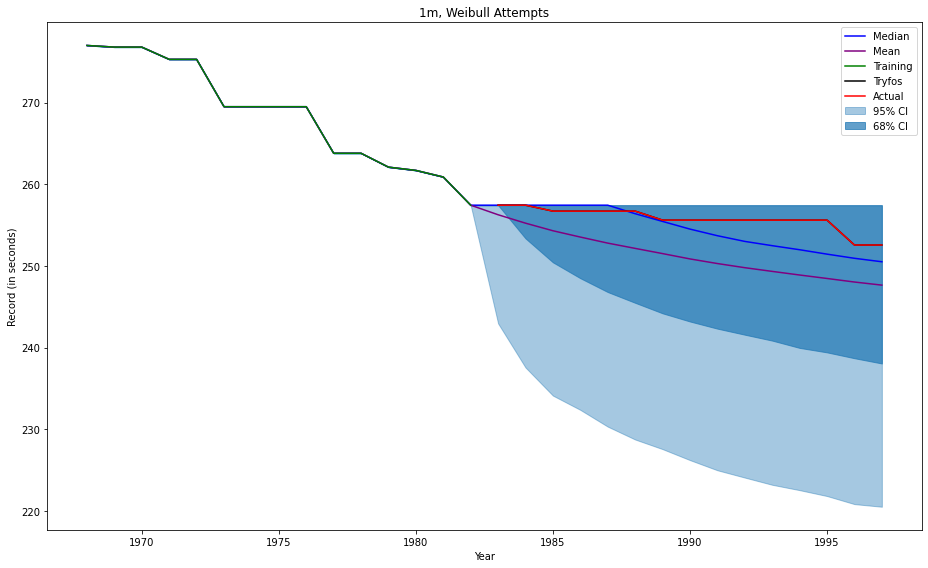

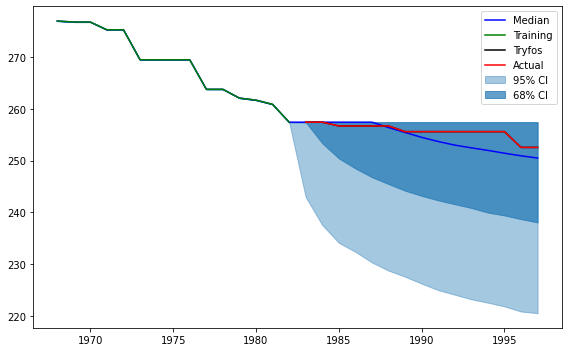

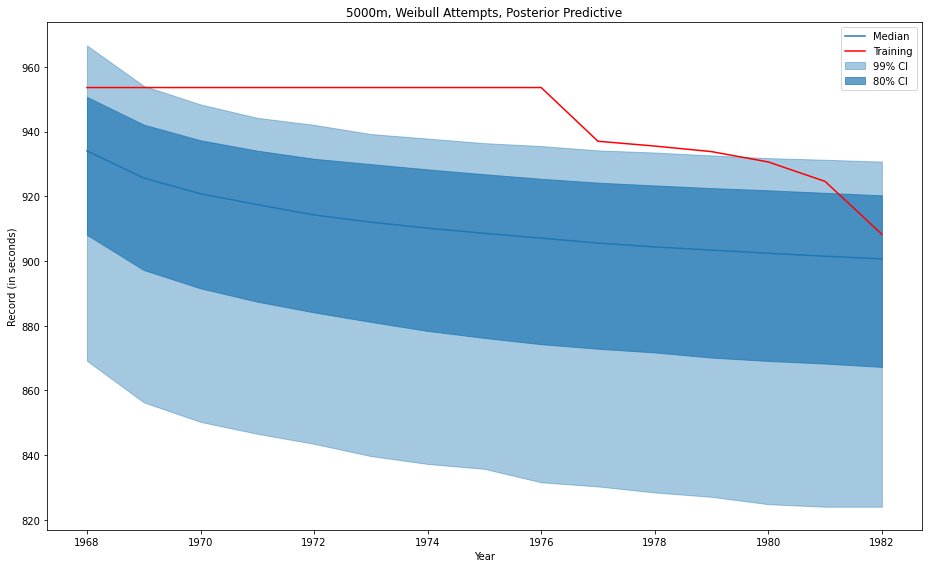

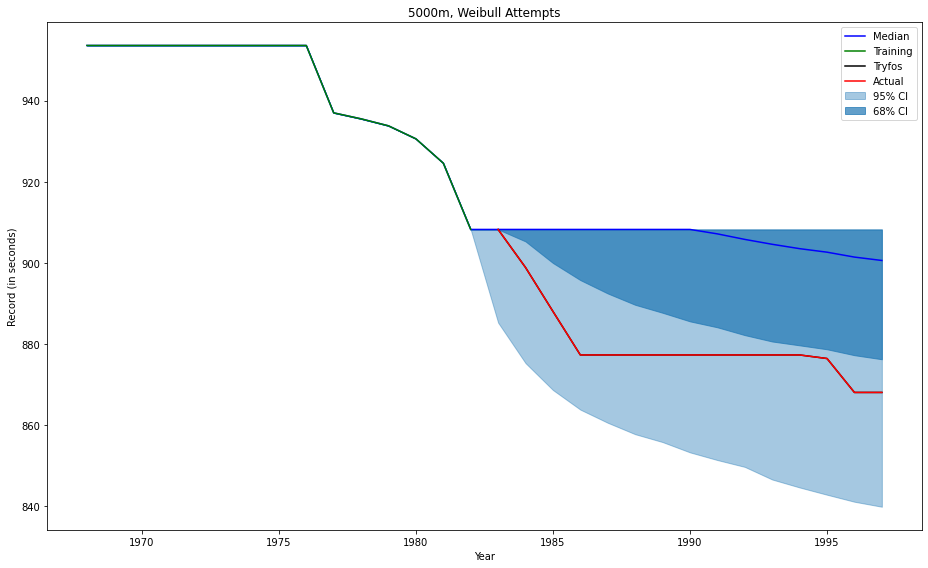

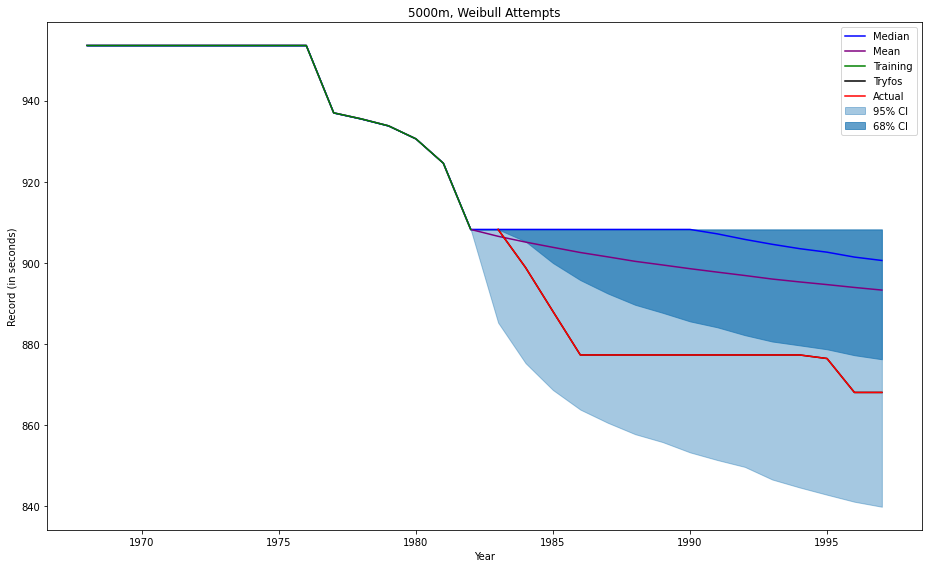

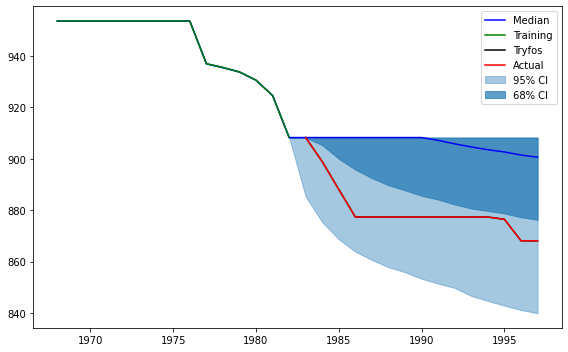

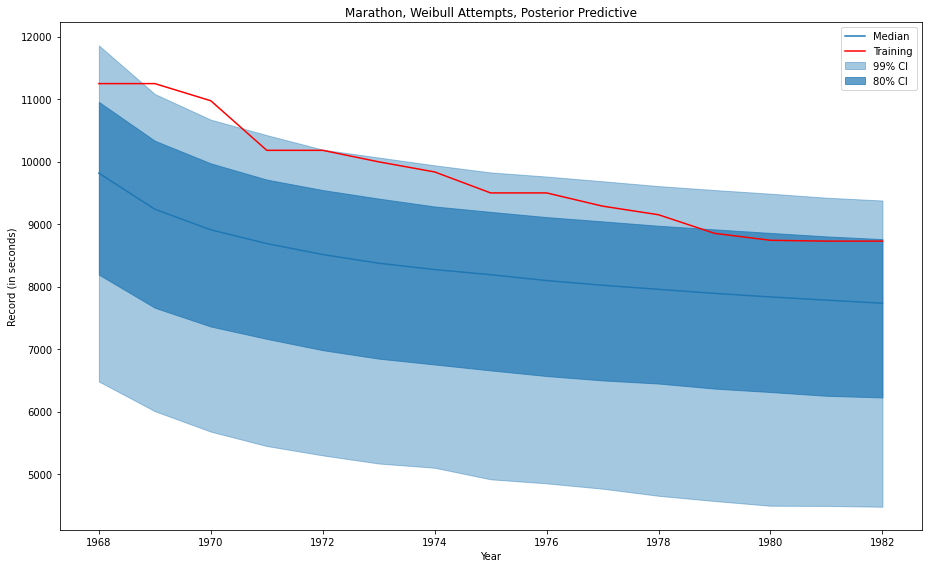

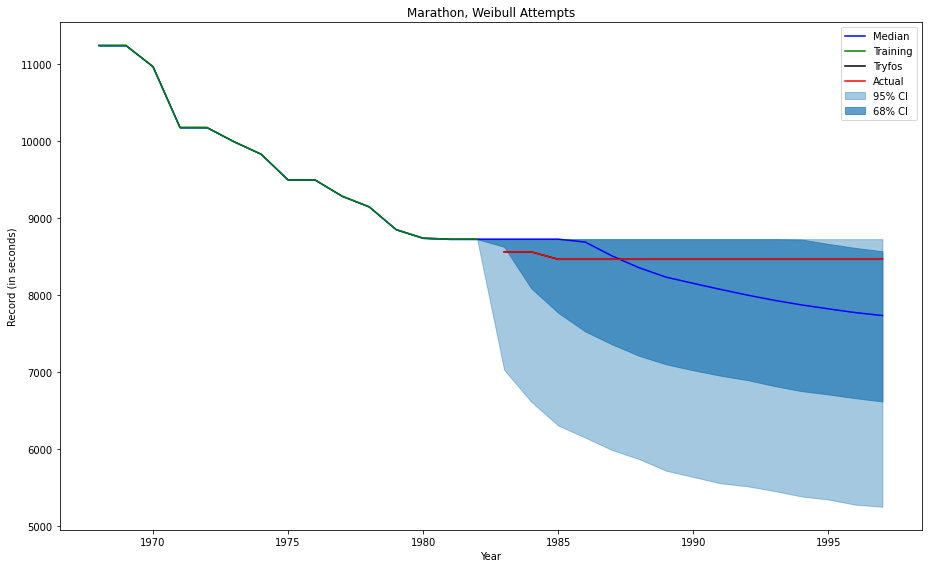

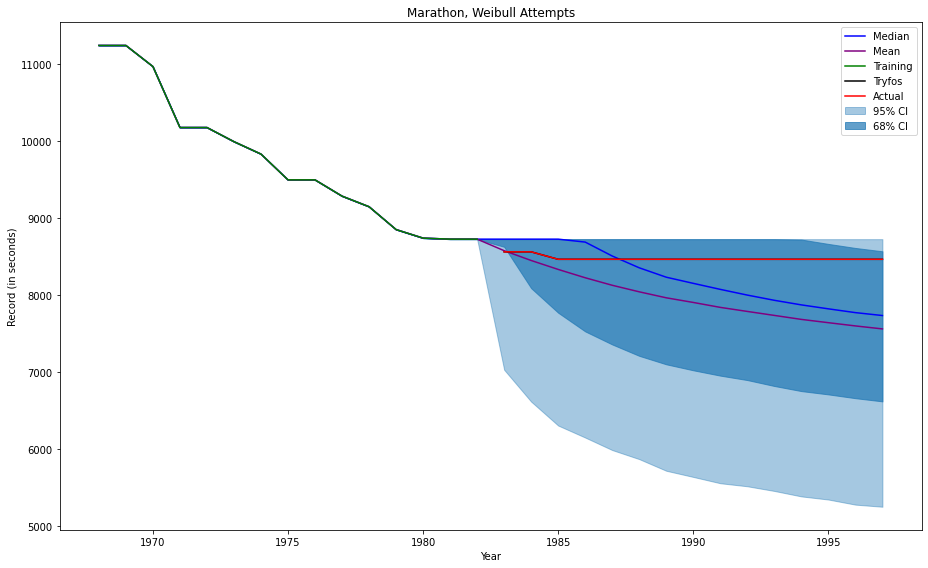

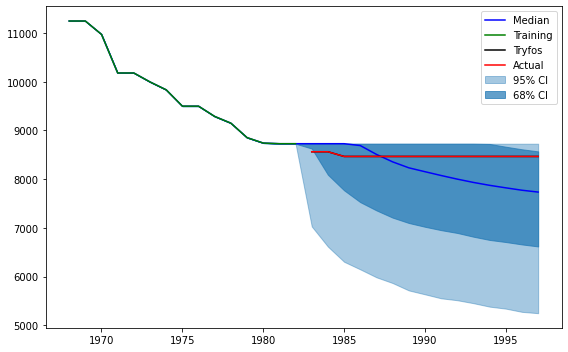

In [17]:
#whiches = ["1m", "5000m", "10000m", "Marathon"]
#whiches = ["1000m", "1m", "5000m", "Marathon", "10000m", "20000m"]
#whiches = []
whiches = ['1000m', '1m', '5000m', 'Marathon']


msesw = {}
avg_log_probsw = {}

fails = []

#whiches = ["1000m"]
for which in whiches:

    # try:

    df = pd.read_csv("tryfos_data_womens.csv")
    years, records = df["Year"].values, df[which].values # Years 1983 and onward are just forecasts

    training_years = years[:15]
    training_records = records[:15]
    tryfos_years = years[15:]
    tryfos_fcast = records[15:]

    actual_df = pd.read_csv("tryfos_actual_womens.csv")
    _, actual_records = actual_df["Year"].values, actual_df[which].values

    prior_parameters = {
    'alpha' : {
        'lower' : 1e-5,
        'upper' : 10e4,
    },
    'beta' : {
        'lower' : 1e-5,
        'upper': 10e4,
        }
    }

    model = fm.WeibullForecastModel(training_records, prior_parameters=prior_parameters, attempt_distribution="weibull", 
                        kind="min", train='all', fcast_len=len(tryfos_fcast), fcast_test_data=actual_records)


    model.fit(chains=3, draws=2500)
    model.posterior_predictive()
    model.forecast()


    # MSE calculation
    median = np.quantile(model.forecast_samples[:,-15:], q=0.5, axis=0)
    mean = np.mean(model.forecast_samples[:,-15:], axis=0)
    bayes_mse = fm.mse(median, model.fcast_test_data)
    #tryfos_mse = fm.mse(tryfos_fcast, model.fcast_test_data)
    baseline_fcast = training_records[-1]*np.ones_like(model.fcast_test_data)
    baseline_mse = fm.mse(baseline_fcast, model.fcast_test_data)
    bayes_mean_mse = fm.mse(mean, model.fcast_test_data)
    msesw[which] = (bayes_mse, baseline_mse, bayes_mean_mse)

    # Average logp
    avg_log_probsw[which] = np.mean(model.posterior_predictive_ppc["log_like_holdout"])

    # Plots
    fig = plot_posterior_predictive(model, f"{which}, Weibull Attempts, Posterior Predictive")
    fig.savefig(f"womens/flat_priors/weibull/final_{which}_weibull_attempts_post_pred.png")

    # fig = plot_forecast(model, tryfos_fcast, f"{which}, Gumbel Attempts, Forecast", actual_records)
    # fig.savefig(f"{which}_gumbel_attempts_forecast.png")

    fig = plot_forecast_fin(model, tryfos_fcast, f"{which}, Weibull Attempts", actual_records)
    fig.savefig(f"womens/flat_priors/weibull/final_{which}_weibull_attempts_forecast.png")

    fig = plot_forecast_fin_w_mean(model, tryfos_fcast, f"{which}, Weibull Attempts", actual_records)
    fig.savefig(f"womens/flat_priors/weibull/final_{which}_weibull_attempts_forecast_w_mean.png")

    fig = plot_forecast_small(model, tryfos_fcast, f"{which}, Weibull Attempts", actual_records)
    fig.savefig(f"womens/flat_priors/weibull/s_final_{which}_weibull_attempts_forecast.png")



    # except:
    #    print(f"Error: failed on {which}")
    #    fails.append(which)

In [ ]:
fm.mse(mean, model.fcast_test_data)

In [20]:
mean

array([8577.92721572, 8450.4787749 , 8334.17768855, 8225.90577476,
       8128.11221621, 8043.01591472, 7965.15976251, 7904.76308606,
       7840.50505449, 7787.92460825, 7736.1570845 , 7684.31612496,
       7641.51225261, 7599.46833482, 7560.57393435])

In [22]:
np.mean((model.fcast_test_data - mean)**2)

346133.4515203826

In [23]:
(model.fcast_test_data - mean)**2

array([2.22821769e+02, 1.26610261e+04, 1.73771218e+04, 5.76452370e+04,
       1.14168154e+05, 1.78915536e+05, 2.50840943e+05, 3.14986874e+05,
       3.91243927e+05, 4.59786237e+05, 5.32670681e+05, 6.11029680e+05,
       6.79780046e+05, 7.50877127e+05, 8.19796360e+05])

In [25]:
(model.fcast_test_data - mean)

array([-14.92721572, 112.5212251 , 131.82231145, 240.09422524,
       337.88778379, 422.98408528, 500.84023749, 561.23691394,
       625.49494551, 678.07539175, 729.8429155 , 781.68387504,
       824.48774739, 866.53166518, 905.42606565])

In [26]:
905**2

819025

In [18]:
msesw

{'1000m': (149.44667501166427, 7.689393333333416, 285.40286667011793),
 '1m': (4.034055263677033, 4.880179999999975, 22.672634867813677),
 '5000m': (751.1173781791207, 889.6367333333305, 406.65113219807733),
 'Marathon': (185100.61883429097, 63121.46666666667, 346133.4515203826)}

In [19]:
avg_log_probsw

{'1000m': -17.477413923876508,
 '1m': -17.553920273557125,
 '5000m': -42.06179028435986,
 'Marathon': -17.61972665164806}